In [31]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [5]:
FOLD = 0
MODELS_DIR ='/cosma6/data/dp004/dc-cues1/tree_models/'
MODEL='rnf'

In [13]:
with open(MODELS_DIR+MODEL+f'_{FOLD}', 'rb') as f:
    rf = pickle.load(f)
x_test = pd.read_hdf(MODELS_DIR+MODEL+f'_{FOLD}_test_feats.hdf5',
                     key="df", mode="r")
y_test = pd.read_hdf(MODELS_DIR+MODEL+f'_{FOLD}_test_labels.hdf5',
                     key="df", mode="r")

In [14]:
preds = rf.predict(x_test)

In [35]:
cm = confusion_matrix(y_test, preds)
cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]


In [36]:
cm

array([[0.91826391, 0.08173609],
       [0.11785162, 0.88214838]])

In [37]:
dark_as_light = x_test[(y_test == 0) & (preds == 1)]
light_as_dark = x_test[(y_test == 1) & (preds == 0)]


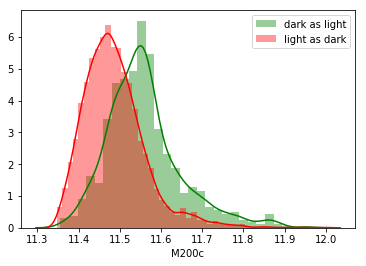

In [38]:
sns.distplot(np.log10(dark_as_light['M200c'][dark_as_light['M200c']<1.e12]),
                 color='g', label = 'dark as light')
sns.distplot(np.log10(light_as_dark['M200c'][light_as_dark['M200c']<1.e12]),
                 color='r', label = 'light as dark')
plt.legend()

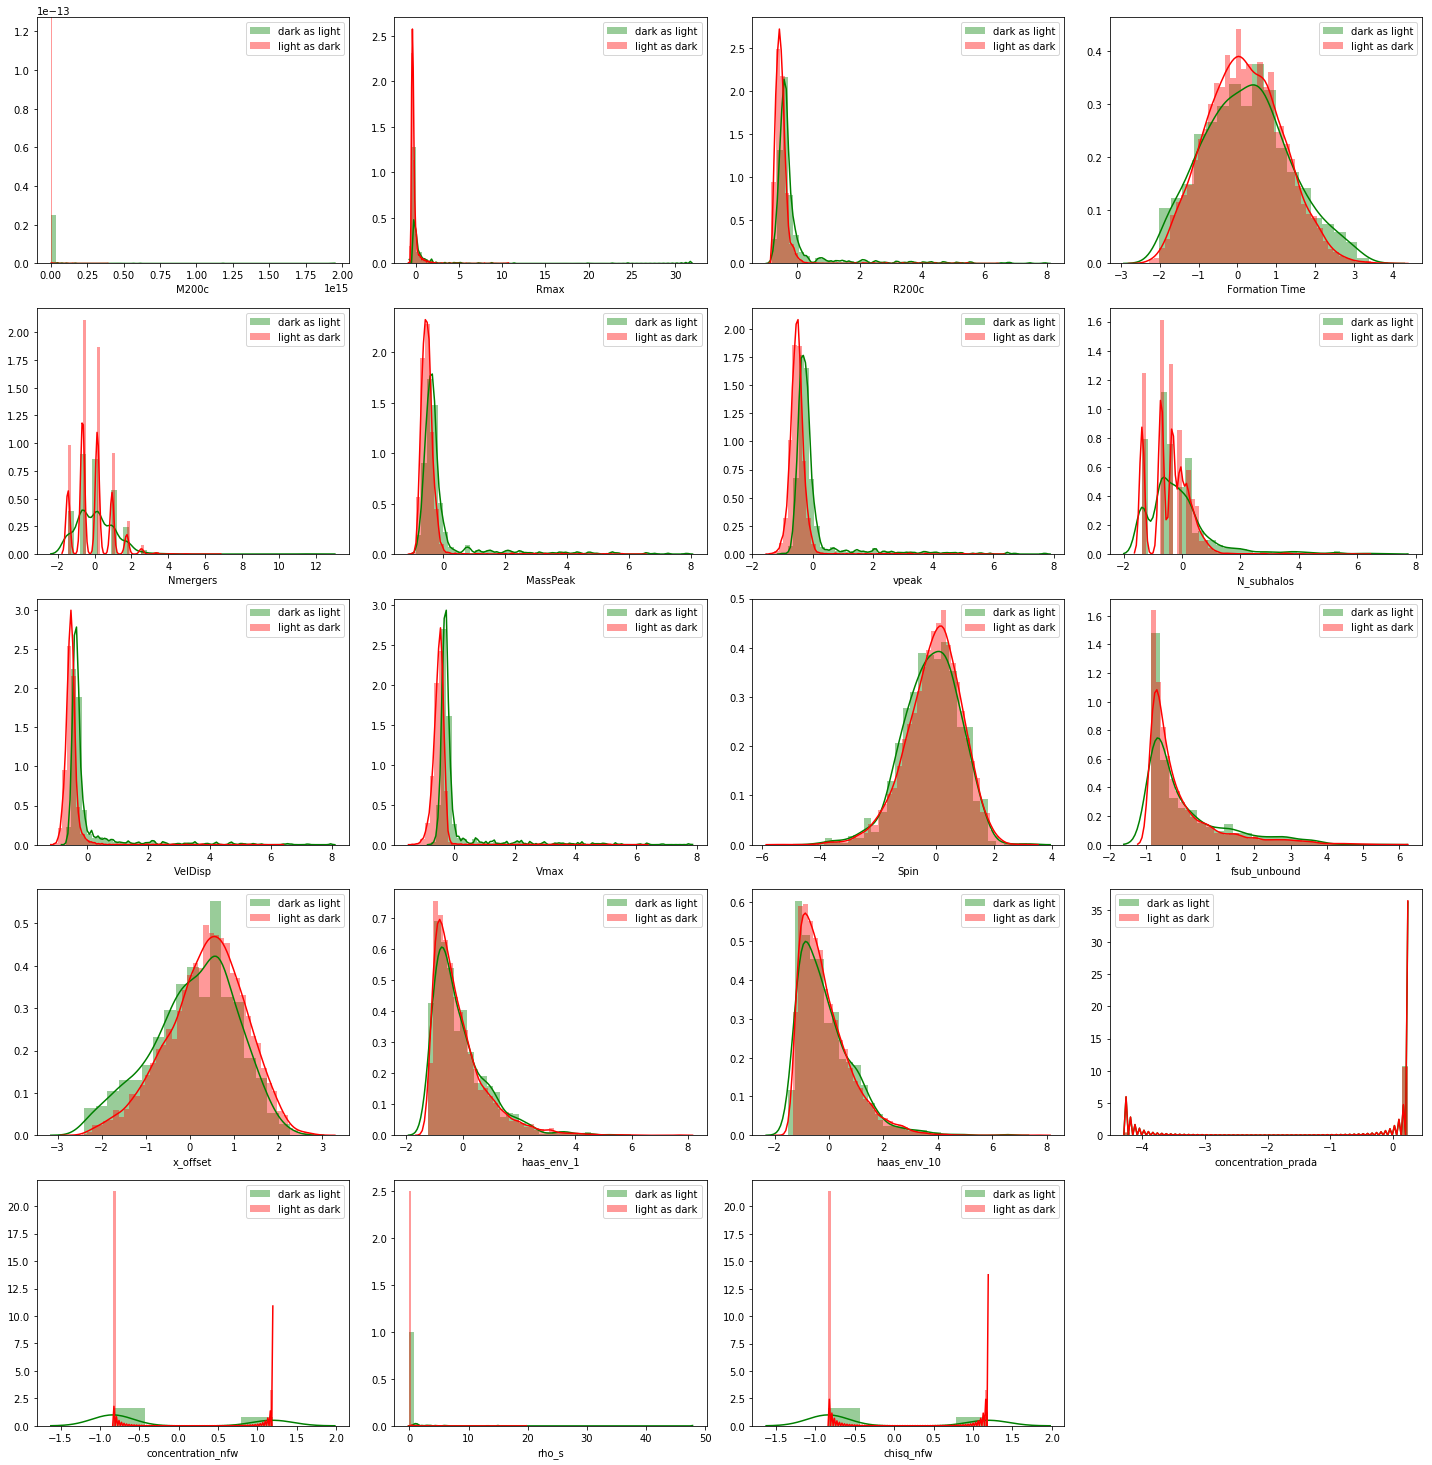

In [39]:
fig = plt.figure(figsize = (20, 25))
j = 0
for i in x_test.columns:
    plt.subplot(6, 4, j+1)
    j += 1
    sns.distplot(dark_as_light[i],
                 color='g', label = 'dark as light')
    sns.distplot(light_as_dark[i],
                 color='r', label = 'light as dark')
    plt.legend(loc='best')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()